<a href="https://colab.research.google.com/github/sanlamia/MLsummer24/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 100: Cost 0.5291490952926284
Iteration 200: Cost 0.5246315663189094
Iteration 100: Cost 0.640244832157597
Iteration 200: Cost 0.5810122287720816
Iteration 100: Cost 0.5209076158052102
Iteration 200: Cost 0.5177970554990101


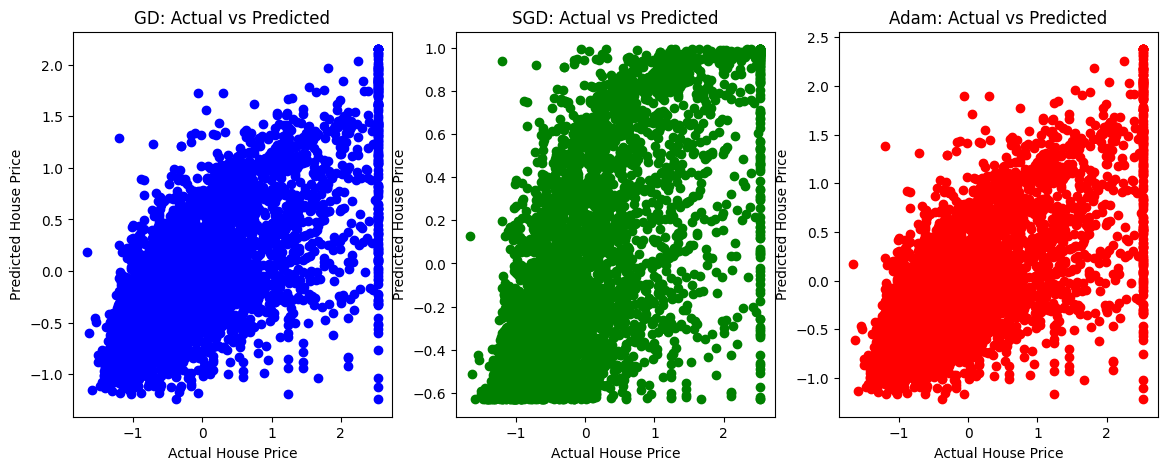

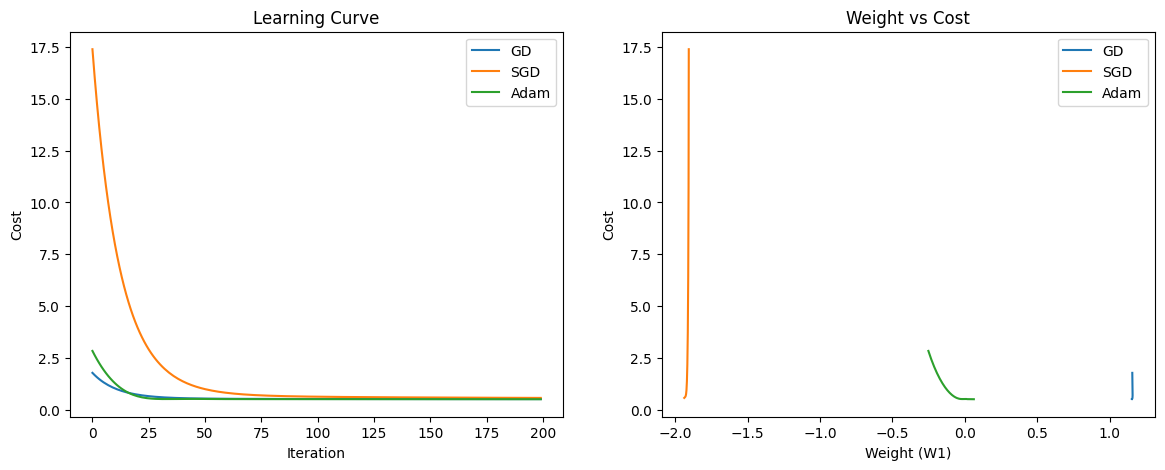

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# Load California Housing Dataset
data = fetch_california_housing()
X = data.data[:, 0].reshape(-1, 1)  # Use only one feature for simplicity (MedInc)
y = data.target.reshape(-1, 1)  # Target is the house price

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Define the simple ANN class
class SimpleANN:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        y_pred = self.Z2
        return y_pred

    def backward(self, X, y, y_pred, learning_rate, optimizer, t, m_W1, v_W1, m_W2, v_W2, beta1, beta2, epsilon):
        m = X.shape[0]
        dZ2 = y_pred - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.sigmoid_derivative(self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        if optimizer == 'adam':
            # Adam optimization
            m_W1 = beta1 * m_W1 + (1 - beta1) * dW1
            v_W1 = beta2 * v_W1 + (1 - beta2) * (dW1 ** 2)
            m_W1_hat = m_W1 / (1 - beta1 ** t)
            v_W1_hat = v_W1 / (1 - beta2 ** t)
            self.W1 -= learning_rate * m_W1_hat / (np.sqrt(v_W1_hat) + epsilon)

            m_W2 = beta1 * m_W2 + (1 - beta1) * dW2
            v_W2 = beta2 * v_W2 + (1 - beta2) * (dW2 ** 2)
            m_W2_hat = m_W2 / (1 - beta1 ** t)
            v_W2_hat = v_W2 / (1 - beta2 ** t)
            self.W2 -= learning_rate * m_W2_hat / (np.sqrt(v_W2_hat) + epsilon)

            self.b1 -= learning_rate * db1
            self.b2 -= learning_rate * db2
        else:
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2

        return m_W1, v_W1, m_W2, v_W2

    def train(self, X, y, iterations, learning_rate, optimizer='GD', beta1=0.9, beta2=0.999, epsilon=1e-8):
        cost_history = []
        weight_history = []

        m_W1 = np.zeros_like(self.W1)
        v_W1 = np.zeros_like(self.W1)
        m_W2 = np.zeros_like(self.W2)
        v_W2 = np.zeros_like(self.W2)

        for t in range(1, iterations + 1):
            y_pred = self.forward(X)
            cost = np.mean((y_pred - y) ** 2)
            cost_history.append(cost)
            weight_history.append((self.W1.copy(), self.W2.copy()))

            if optimizer == 'adam':
                m_W1, v_W1, m_W2, v_W2 = self.backward(X, y, y_pred, learning_rate, optimizer, t,
                                                       m_W1, v_W1, m_W2, v_W2, beta1, beta2, epsilon)
            else:
                self.backward(X, y, y_pred, learning_rate, optimizer, t, m_W1, v_W1, m_W2, v_W2, beta1, beta2, epsilon)

            if t % 100 == 0:
                print(f"Iteration {t}: Cost {cost}")

        return cost_history, weight_history

    def predict(self, X):
        return self.forward(X)

# Define the hyperparameters
hidden_neurons = 10
iterations = 200
learning_rate = 0.01

# Train with Gradient Descent
ann_gd = SimpleANN(input_size=1, hidden_size=hidden_neurons, output_size=1)
cost_history_gd, weight_history_gd = ann_gd.train(X_train, y_train, iterations, learning_rate, optimizer='GD')
predictions_gd = ann_gd.predict(X_test)

# Train with Stochastic Gradient Descent
ann_sgd = SimpleANN(input_size=1, hidden_size=hidden_neurons, output_size=1)
cost_history_sgd, weight_history_sgd = ann_sgd.train(X_train, y_train, iterations, learning_rate, optimizer='SGD')
predictions_sgd = ann_sgd.predict(X_test)

# Train with Adam Optimizer
ann_adam = SimpleANN(input_size=1, hidden_size=hidden_neurons, output_size=1)
cost_history_adam, weight_history_adam = ann_adam.train(X_train, y_train, iterations, learning_rate, optimizer='adam')
predictions_adam = ann_adam.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test, predictions_gd, color='blue')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("GD: Actual vs Predicted")

plt.subplot(1, 3, 2)
plt.scatter(y_test, predictions_sgd, color='green')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("SGD: Actual vs Predicted")

plt.subplot(1, 3, 3)
plt.scatter(y_test, predictions_adam, color='red')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Adam: Actual vs Predicted")

plt.show()

# Plot the learning curve
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(cost_history_gd, label="GD")
plt.plot(cost_history_sgd, label="SGD")
plt.plot(cost_history_adam, label="Adam")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Learning Curve")
plt.legend()

# Plot weight, cost during each iteration
plt.subplot(1, 2, 2)
plt.plot([w[0][0,0] for w in weight_history_gd], cost_history_gd, label="GD")
plt.plot([w[0][0,0] for w in weight_history_sgd], cost_history_sgd, label="SGD")
plt.plot([w[0][0,0] for w in weight_history_adam], cost_history_adam, label="Adam")
plt.xlabel("Weight (W1)")
plt.ylabel("Cost")
plt.title("Weight vs Cost")
plt.legend()

plt.show()
